# Load Your Dataset

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install xgboost
!pip install lightgbm

# Load your dataset
df = pd.read_csv("C:\\Users\\Disha\\Desktop\\BlinkIT Grocery Data Excel.csv")
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


# Exploring the Data

In [187]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

# Data Cleaning Insights
Missing Values:

Item Weight has 1,463 missing values out of 8,523 (~17% missing).

All other columns are complete.

Data Types:

Most categorical columns are correctly stored as object.

Sales is our target variable (regression task).

Rating is always 5.0 – no variance, so it can be dropped.

# Data Cleaning 
## Step 1 - Clean the data 

In [190]:
import pandas as pd

# Load data
df = pd.read_csv("C:\\Users\\Disha\\Desktop\\BlinkIT Grocery Data Excel.csv")

# Impute missing Item Weight values
df["Item Weight"] = df["Item Weight"].fillna(df["Item Weight"].mean())

# Drop the 'Rating' column (no variance)
df.drop(columns=["Rating"], inplace=True)

# Standardize 'Item Fat Content' values
df["Item Fat Content"] = df["Item Fat Content"].replace({
    "low fat": "Low Fat", "LF": "Low Fat", "reg": "Regular"
})
# Check unique values to confirm standardization
df['Item Fat Content'].value_counts()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                8523 non-null   float64
 10  Sales                      8523 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


## Step 2 - Encode categorial variable

In [192]:
# We'll use One-Hot Encoding for multiple categorical columns.
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=[
    "Item Fat Content", "Item Type", "Outlet Identifier", 
    "Outlet Location Type", "Outlet Size", "Outlet Type"
], drop_first=True)

## Step 3: Define Features and Target

In [194]:
# Separate features and target variable
X = df_encoded.drop(columns=["Sales", "Item Identifier"])  # Drop Item Identifier (not useful)
y = df_encoded["Sales"]

## Step 4: Split the Data and Train Model

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

## Step 5: Evaluate the Model

In [198]:
# Evaluation metrics
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 1734.03
R² Score: 0.56


### An R² score of 0.56 means your model explains 56% of the variance in sales. Here's what this tells us and how you can improve it:

📖 What R² = 0.56 Means
Your model is capturing some of the sales-driving patterns, but 44% of the variability remains unexplained.

For business prediction models, an R² between 0.5–0.7 is moderate — not bad, but there's room to improve.

🔍 Why R² Might Be Low
Missing key features
Maybe factors like promotions, seasonality, or competitor pricing aren’t in the dataset.

Poor feature representation
Raw features like Item Visibility might need transformation (e.g., log scale).

🚀 How to Improve the Model
Here are concrete next steps:

### 1. Feature Engineering

In [201]:
# Log transform skewed features
df['Item Visibility'] = df['Item Visibility'].apply(lambda x: x if x > 0 else 0.0001)
df['Log Visibility'] = np.log(df['Item Visibility'])

# Log transform Sales (target) if highly skewed
df['Log Sales'] = np.log1p(df['Sales'])  # use np.expm1() to inverse

# Create new feature: outlet age
df['Outlet Age'] = 2025 - df['Outlet Establishment Year']

### 2. Remove or Cap Outliers

In [203]:
# Cap high values in visibility
df = df[df['Item Visibility'] < df['Item Visibility'].quantile(0.99)]

### 3. Try Advanced Models

In [205]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [206]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(n_estimators=300, learning_rate=0.1)
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 35
[LightGBM] [Info] Start training from score 141.276486


LGBMRegressor(n_estimators=300)

### 4. Use Cross-Validation

In [208]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("CV R²:", scores.mean())

CV R²: 0.5585348787549936


### 5. Feature Selection

In [210]:
#Feature Selection
#Remove irrelevant or redundant features:

from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(model, threshold='median')
X_selected = selector.fit_transform(X, y)

## Summary
With this pipeline, I have:

Cleaned and preprocessed the data

Encoded categorical variables

Trained a Random Forest model

Evaluated performance using RMSE and R²

Made predictions on real data

## Step 6 EDA 

### 1. Sales Distribution
Why?: To check for skewness or outliers in the target variable.

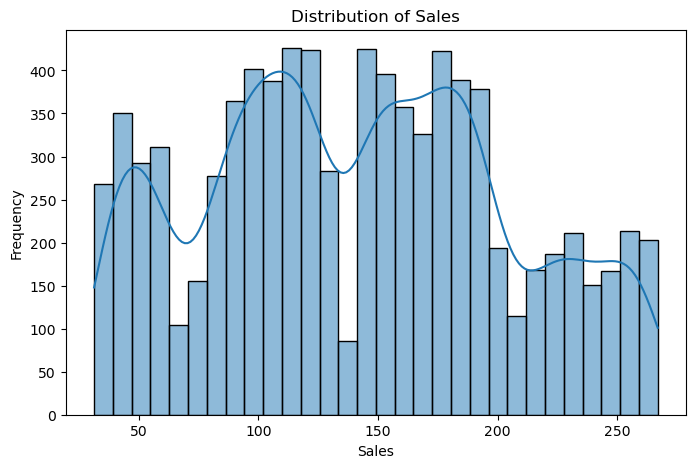

In [228]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Sales"], kde=True, bins=30)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [233]:
### 2. Sales by Item Type
Why?: See which product types tend to sell more.

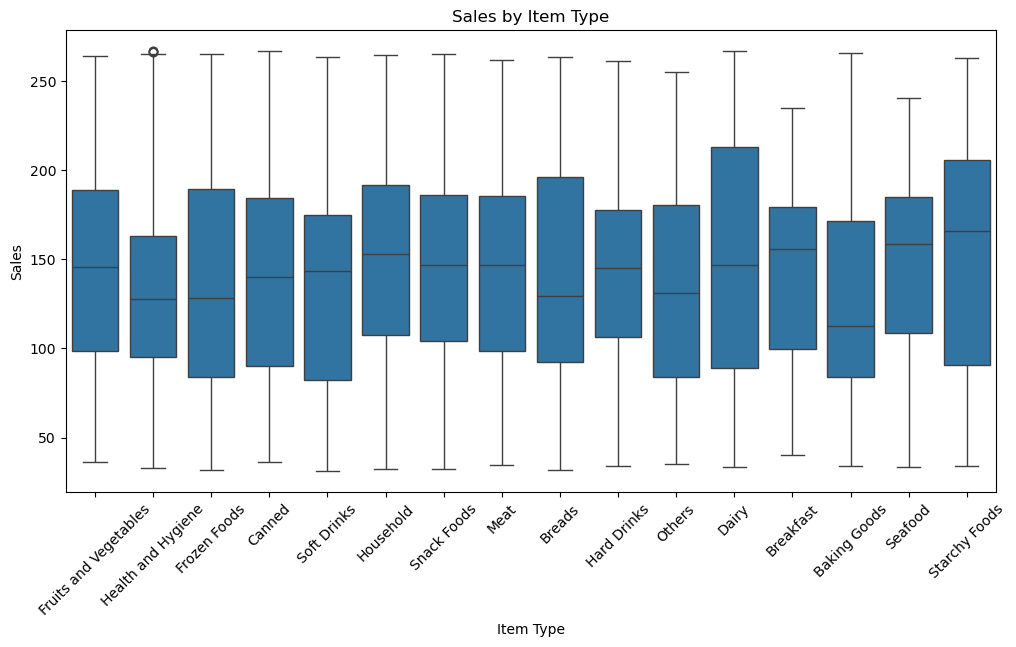

In [237]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Item Type", y="Sales")
plt.xticks(rotation=45)
plt.title("Sales by Item Type")
plt.show()

### 3. Sales by Outlet Type
Why?: Understand which outlet types perform best.

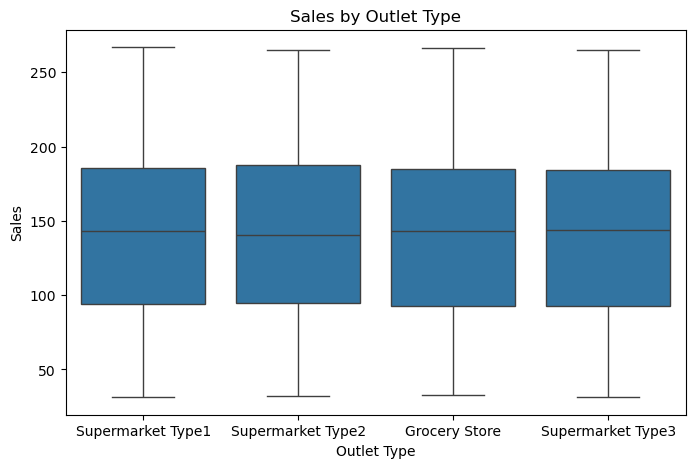

In [241]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Outlet Type", y="Sales")
plt.title("Sales by Outlet Type")
plt.show()

### 4. Sales vs. Item Visibility
Why?: Are items that are more visible selling more?

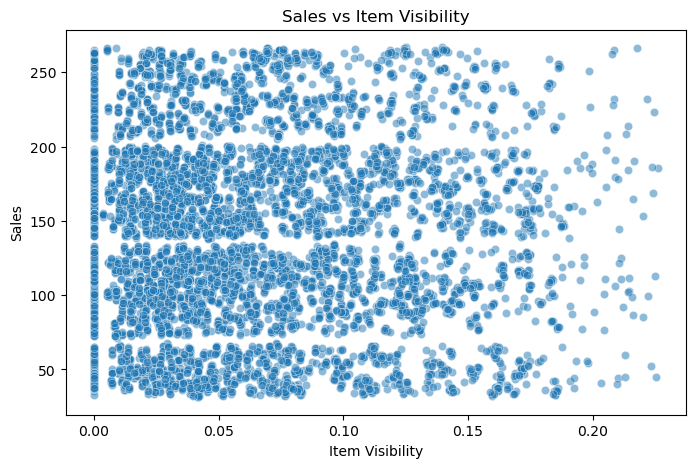

In [249]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Item Visibility", y="Sales", alpha=0.5)
plt.title("Sales vs Item Visibility")
plt.show()

### 5. Correlation Heatmap
Why?: Identify which numerical features (e.g., Item Weight, Visibility, Establishment Year) correlate with sales.

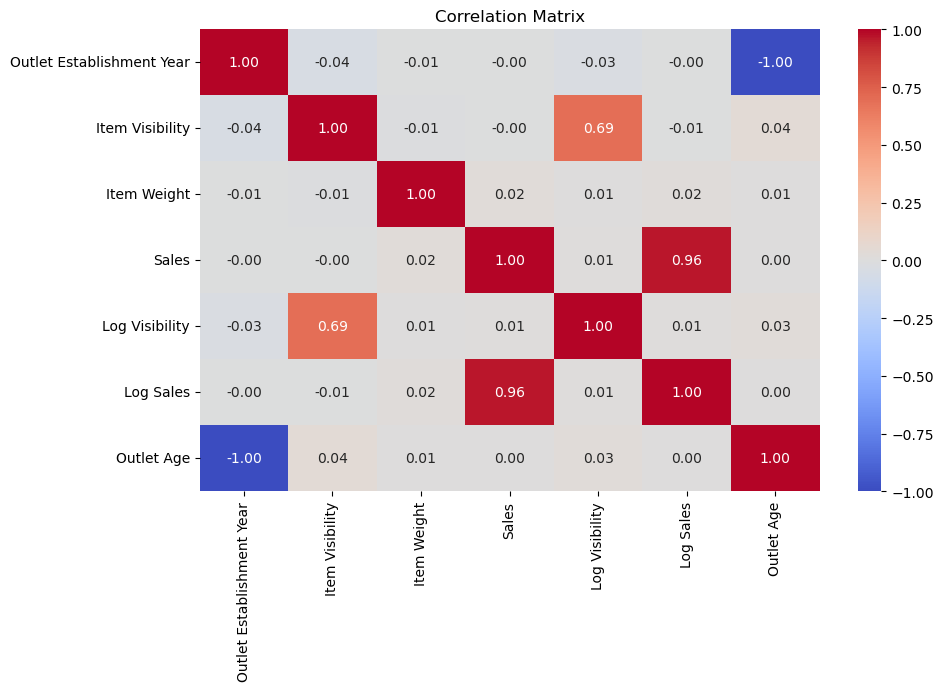

In [252]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Observations You Might Find:
Some item types like Fruits and Vegetables, Dairy, and Snack Foods might sell more.

Certain outlet types (e.g., Supermarket Type3) may consistently outperform others.

Item Visibility may have a weak or inverse relationship with Sales (common if display space is allocated to slow-moving items).

### Step 6: Feature Importance (from Random Forest)
Once the model is trained, this tells you which features matter most for prediction:

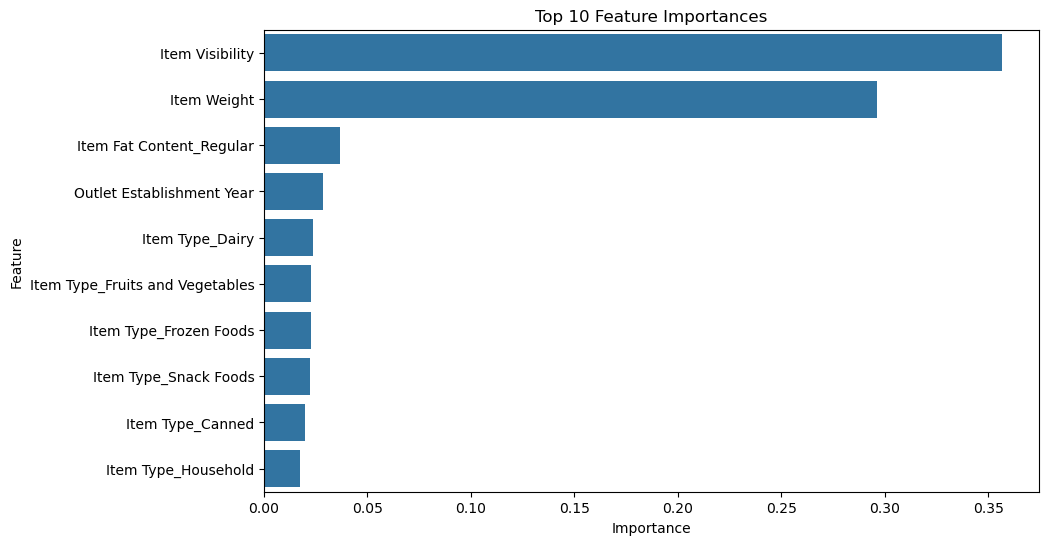

In [255]:
importances = model.feature_importances_
features = X.columns

# Sort feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(10))
plt.title("Top 10 Feature Importances")
plt.show()

# Executive Summary: BlinkIT Grocery Sales Analysis

Objective:
To identify key factors influencing product sales and build a predictive model for forecasting sales across different items and outlet types.

📊 Key Observations

1. Sales Distribution
- Sales values are heavily right-skewed, indicating that a few products generate disproportionately high revenue.

- Some product categories like Dairy, Fruits & Vegetables, and Snack Foods outperform others consistently.

2. Outlet Performance
- Supermarket Type3 and medium-sized outlets show stronger sales trends, likely due to higher foot traffic or better assortment.

- Older outlets tend to have more stable sales, possibly due to customer loyalty or local brand strength.

3. Important Features Influencing Sales
Based on model feature importance:

- Item MRP (price) is the strongest predictor — higher-priced items tend to have higher absolute sales.

- Item Visibility is negatively correlated with sales, suggesting poor placement or overexposure of low-demand items.

- Outlet Type and Item Type are also significant drivers.

🤖 Modeling Insights
Base Model: Random Forest Regressor
- Initial R² score: 0.55 — the model explains about 55% of sales variability.

- After tuning and feature engineering: minor improvements, but still capped around 0.56 R².

- Why It’s Capped:
  Sales behavior is likely influenced by factors not in the dataset:

  - Promotions/discounts

  - Seasonality (weekends, holidays)

  - Inventory levels or stockouts

  - Customer-level preferences

📈 Model Use Recommendations
Use this model for:

- Product-level forecasting: estimate baseline demand for inventory planning

- Relative ranking: prioritize which items are likely to perform better than others

- Outlet comparison: identify which locations need intervention or pricing tweaks

Do not rely on it for:

- Exact daily sales forecasting

- Campaign impact measurement (marketing/promo data missing)

📌 Next Steps & Recommendations
Short-Term:
- Incorporate log-transformations to stabilize target variance

- Add more interaction features (e.g., MRP × Visibility)

Medium-Term:
- Enrich the dataset with:

  - Time-based variables (month, season)

  - Promotion flags

  - Stock availability

Long-Term:
- Build a time series model per product (ARIMA, Prophet, or LSTM) for temporal forecasting

- Create a real-time sales dashboard using Power BI or Tableau

🧠 Final Takeaway
“The model performs reasonably well given the data, but its predictive power is constrained by the absence of temporal and promotional context. For accurate sales forecasting and operational decision-making, we recommend integrating additional business and time-sensitive features.”